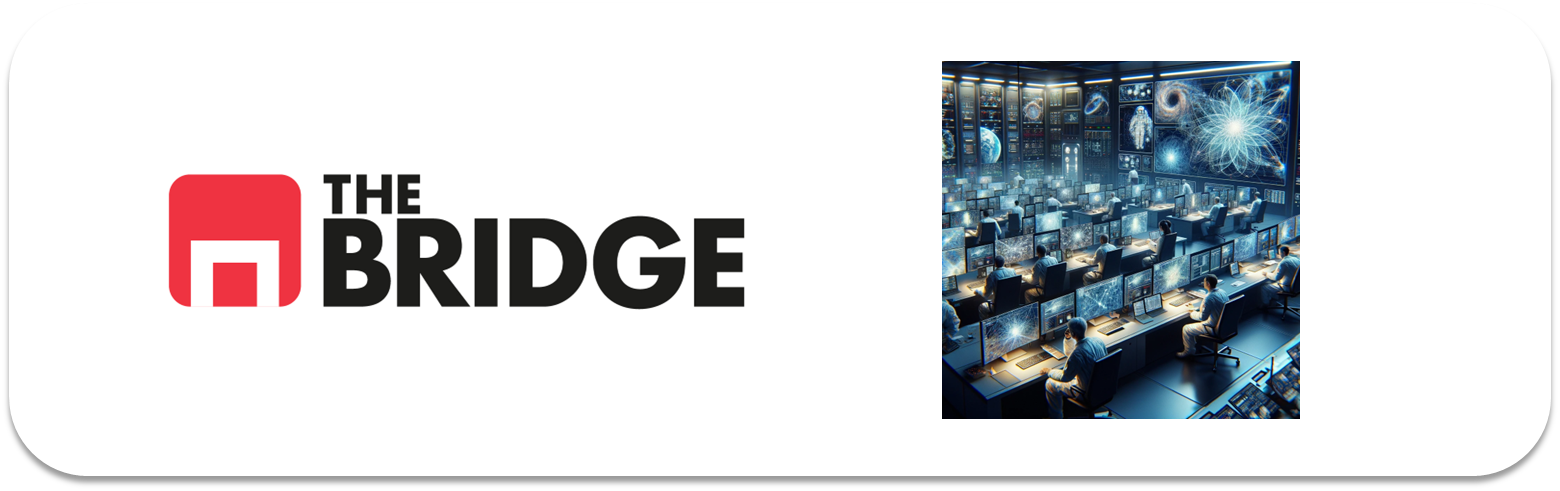

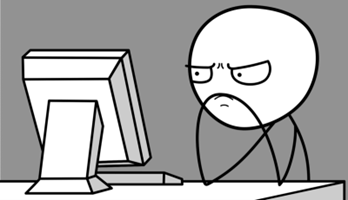

Para ejercitarte y afianzar lo aprendido sobre **Redes Convolucionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import keras
import cv2

## El problema de "Negocio"
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en https://www.kaggle.com/datasets/puneet6060/intel-image-classification?select=seg_test como `seg_train.zip` y `seg_test.zip` (o bien en el botón de download).  

NOTA: Son archivos bastante grandes (386MB en total). Por supuesto, no es necesario que tengas que mantenerlos en tu ordenador una vez realizado el ejercicio, bórralos si es el caso.




### Ejercicio 1

Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones). Para ello:

1. Descarga las imagenes del repositorio de Kaggle en el directorio que vayas a emplear para el ejercicio.
2. Descomprime los datos (son ficheros de imágenes) de forma que tengas dos subdirectorios seg_train y seg_test en el que estén ya colgando directamente los directorios de cada clase de paisajes. Si descargaste seg_pred, puedes eliminarlo.
3. Crea unas variables como las siguientes (ajustándolas a tu caso/rutas particulares):

```python
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"
```
4. Utiliza la siguiente función para crear los X_train, y_train y X_test e y_test:

```python
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)
```


*Pues copiamos lo que nos dicen y lo aplicamos a los dos directorios para tener las X y las y*

In [2]:
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

In [3]:
X_train, y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

### Ejercicio 2

Haz la visualización del dataset: comprueba cuantos datos tienes, que forma, investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.


In [6]:
def show_images_batch(paisajes, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(paisajes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(paisajes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

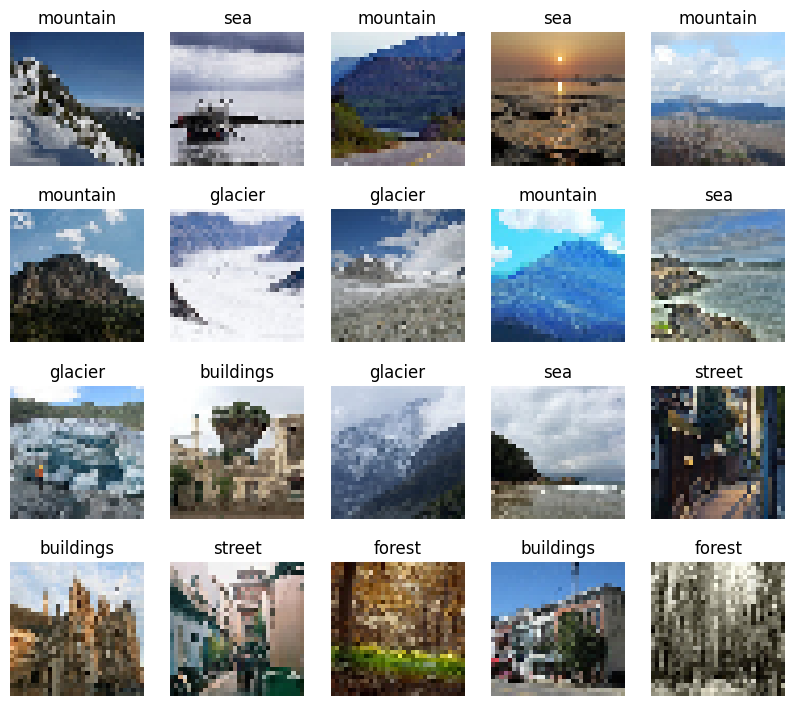

In [7]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

### Ejercicio 3

Ahora haz un pequeño miniEda y normaliza las features



In [8]:
targets = pd.Series(y_train)
targets.value_counts(True)

mountain     0.179032
glacier      0.171335
street       0.169624
sea          0.161998
forest       0.161856
buildings    0.156154
Name: proportion, dtype: float64

In [9]:
X_train = X_train/255
X_test = X_test/255

### Ejercicio 4

Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada. Como guía, copia o parte de la arquitectura del workout (un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer)


In [11]:
capas = [keras.layers.Conv2D(filters=30, kernel_size=(3,3),
                             input_shape=(X_train[0].shape),
                             padding="same",
                             activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=15,
                            kernel_size=(3,3),
                            padding="same",
                            activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=150, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),
        keras.layers.Dense(6,activation="softmax")]
model = keras.Sequential(capas)

### Ejercicio 5

Escoge el resto de hiperparámetros (optimizador, learning_rate, función de pérdida, métrica,...) y compila el modelo. Muestra un resumen del mismo

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 15)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 150)               1

### Ejercicio 6

Entrena el modelo reservando un 20% de los datos del entrenamiento para validar y con los callbacks que creas necesarios. NOTA: Ojo, tendrás que preparar un poco los X,y antes.



In [14]:
mapa = {tipo:indice for indice,tipo in enumerate(targets.unique())} # Rehusando la serie que creamos para ver la distribución del target
mapa

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [15]:
y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])


### Ejercicio 7

Representa el objeto history y comenta la evolución de tu entrenamiento.



In [16]:
X_train, y_train_num = shuffle(X_train, y_train_num)

In [20]:
history = model.fit(X_train,
                    y_train_num,
                    validation_split=.2,
                    epochs=100,
                    batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100


351/351 [==============================] - 5s 10ms/step - loss: 1.0867 - accuracy: 0.5727 - val_loss: 1.0410 - val_accuracy: 0.6024
Epoch 2/100
351/351 [==============================] - 3s 9ms/step - loss: 0.8132 - accuracy: 0.6979 - val_loss: 0.7591 - val_accuracy: 0.7104
Epoch 3/100
351/351 [==============================] - 3s 9ms/step - loss: 0.6907 - accuracy: 0.7470 - val_loss: 0.7222 - val_accuracy: 0.7406
Epoch 4/100
351/351 [==============================] - 4s 11ms/step - loss: 0.6212 - accuracy: 0.7743 - val_loss: 0.7875 - val_accuracy: 0.7032
Epoch 5/100
351/351 [==============================] - 3s 9ms/step - loss: 0.5635 - accuracy: 0.7975 - val_loss: 0.6971 - val_accuracy: 0.7417
Epoch 6/100
351/351 [==============================] - 3s 10ms/step - loss: 0.5203 - accuracy: 0.8089 - val_loss: 0.7351 - val_accuracy: 0.7428
Epoch 7/100
351/351 [==============================] - 3s 9ms/step - loss: 0.4665 - accuracy: 0.8321 - val_loss: 0.6106 - val_accuracy: 0

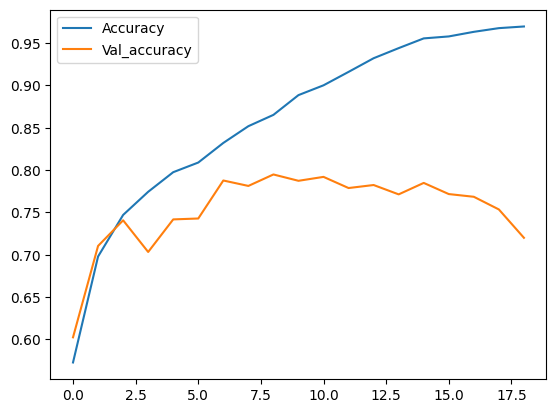

In [21]:
# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')

plt.legend();

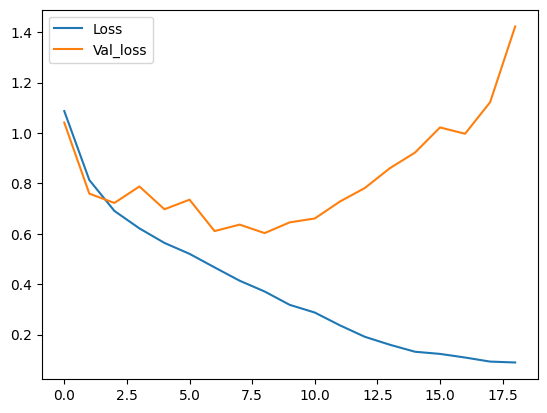

In [22]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();


### Ejercicio 8

Evalua el modelo con los datos de test, además muestra el report de clasificación y la matriz de confusión.



In [24]:
model.evaluate(X_test, y_test_num)

94/94 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.7660


[0.6425512433052063, 0.765999972820282]

In [25]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 [==============================] - 1s 5ms/step


In [28]:
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.70      0.70      0.70       437
      forest       0.92      0.91      0.92       474
     glacier       0.76      0.70      0.73       553
    mountain       0.69      0.77      0.73       525
         sea       0.77      0.70      0.74       510
      street       0.77      0.82      0.80       501

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000



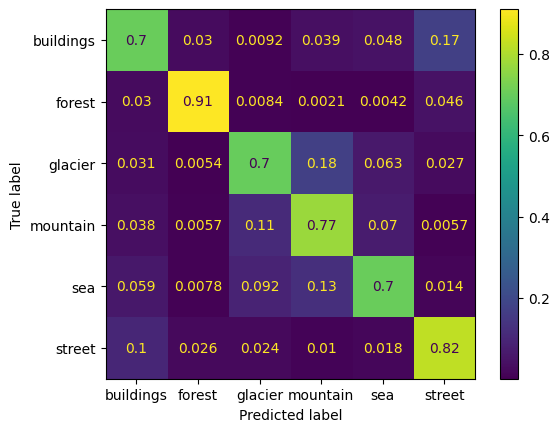

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")


### Ejercicio 9 

Representa algunos de los paisajes donde el modelo comete errores y muestra la confianza que tenía en ellos.





In [30]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

94/94 [==============================] - 1s 5ms/step


In [31]:
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

In [32]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

,True,Predicted,Confianza
434,buildings,street,0.999374
1904,mountain,sea,0.999297
2959,street,buildings,0.998827
65,buildings,street,0.998533
426,buildings,sea,0.998260
...,...,...,...
5,buildings,mountain,0.313872
2756,street,mountain,0.301255
2351,sea,forest,0.294718
1057,glacier,buildings,0.278375


In [33]:
for true_label, predicted_label in errores.iloc[0:10,0:2].values:
    print(true_label, predicted_label)

buildings street
mountain sea
street buildings
buildings street
buildings sea
buildings street
buildings street
buildings street
forest street
glacier sea


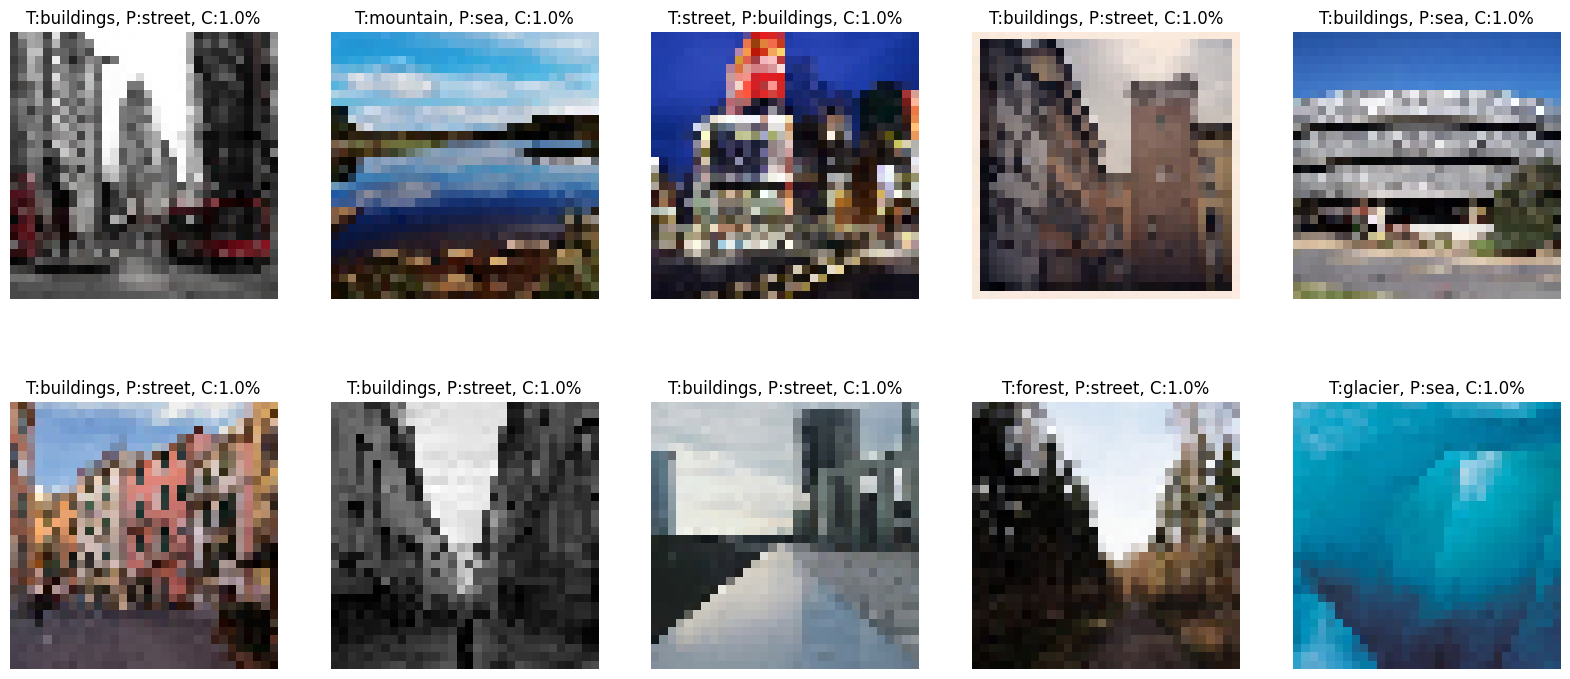

In [34]:
show_images_batch(X_test[errores.iloc[0:10].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:10].values], size_scale= 4)

### Ejercicio EXTRA: 

Aumenta la resolución y repite el ejercicio con la misma topología de red